In [ ]:
import numpy as np
import pandas as pd
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings(action = 'ignore')

import matplotlib.font_manager as fm
from matplotlib import rc

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

In [ ]:
from matplotlib import font_manager, rc

font_path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font)

pal = sns.color_palette('Set2',12)

In [ ]:
clust_eda2 = pd.read_csv('seoul_house_40_chojungo_2.csv')

clust0 = clust_eda2[clust_eda2['cluster'] == 0]
clust1 = clust_eda2[clust_eda2['cluster'] == 1]
clust2 = clust_eda2[clust_eda2['cluster'] == 2]

### 1) 군집별 성별 분포
* 눈에 띄는 군집별 차이는 존재하지 않는다

<AxesSubplot:xlabel='SEX', ylabel='결제수량'>

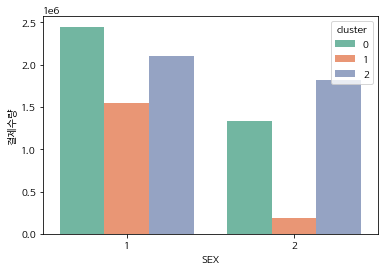

In [ ]:
temp = clust_eda2.groupby(['SEX','cluster'])['결제수량'].sum().reset_index()
sns.barplot(x = 'SEX', y ='결제수량', hue = 'cluster',data = temp, palette = pal)

### 2) 군집별 상품의 평균단가 분석
* 1군집 고객들이 구매하는 상품의 평균단가가 가장 높다.

<AxesSubplot:xlabel='cluster', ylabel='단가'>

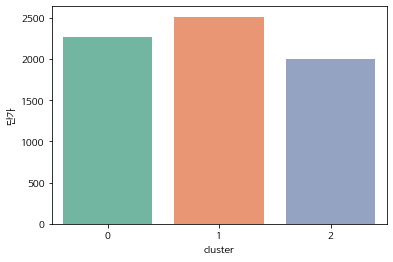

In [ ]:
temp = clust_eda2.groupby(['cluster'])['단가','접근성'].mean().reset_index()
sns.barplot(x = 'cluster', y = '단가', data =temp, palette = pal)

### 3) 군집별 점포 접근성 분석
* 0군집의 경우 입지별 운영점포수가 1,2군집에 비해 많은 것을 알 수 있다

<AxesSubplot:xlabel='cluster', ylabel='접근성'>

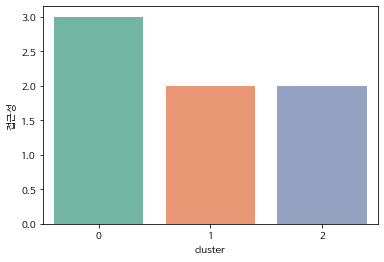

In [ ]:
sns.barplot(x = 'cluster', y = '접근성', data =temp, palette = pal)

### 4) 군집별 결제시간대 분석

#### [0군집]

<AxesSubplot:xlabel='결제시간', ylabel='결제수량'>

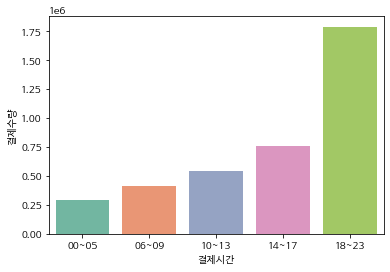

In [ ]:
temp = clust0.groupby(['결제시간'])['결제수량'].sum().reset_index()
sns.barplot(x = '결제시간', y = '결제수량', data = temp, palette = pal)

#### [1군집]

<AxesSubplot:xlabel='결제시간', ylabel='결제수량'>

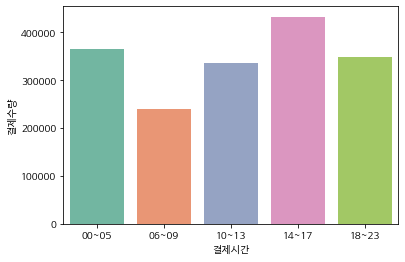

In [ ]:
temp = clust1.groupby(['결제시간'])['결제수량'].sum().reset_index()
sns.barplot(x = '결제시간', y = '결제수량', data = temp, palette = pal)

#### [2군집]

<AxesSubplot:xlabel='결제시간', ylabel='결제수량'>

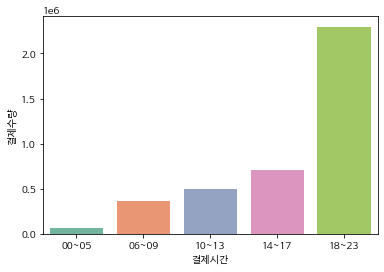

In [ ]:
temp = clust2.groupby(['결제시간'])['결제수량'].sum().reset_index()
sns.barplot(x = '결제시간', y = '결제수량', data = temp, palette = pal)

### 5) 군집별 요일에 따른 결제수량 분석

<AxesSubplot:xlabel='요일', ylabel='결제수량'>

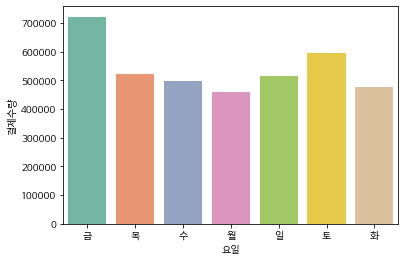

In [ ]:
temp = clust0.groupby(['요일'])['결제수량'].sum().reset_index()
sns.barplot(x = '요일', y = '결제수량', data = temp, palette = pal)

<AxesSubplot:xlabel='요일', ylabel='결제수량'>

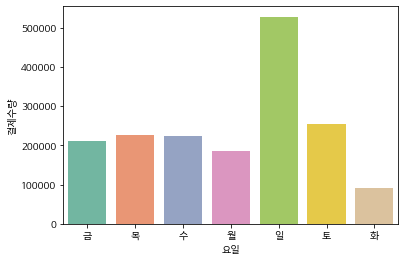

In [ ]:
temp = clust1.groupby(['요일'])['결제수량'].sum().reset_index()
sns.barplot(x = '요일', y = '결제수량', data = temp, palette = pal)

<AxesSubplot:xlabel='요일', ylabel='결제수량'>

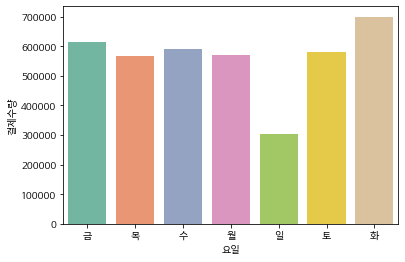

In [ ]:
temp = clust2.groupby(['요일'])['결제수량'].sum().reset_index()
sns.barplot(x = '요일', y = '결제수량', data = temp, palette = pal)

### 6) 군집별 상품대분류에 따른 결제수량 분석

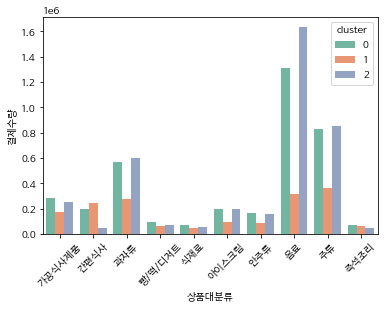

In [ ]:
temp = clust_eda2.groupby(['상품대분류','cluster'])['결제수량'].sum().reset_index()
sns.barplot(x = '상품대분류', y = '결제수량',hue = 'cluster', data = temp, palette = pal)
plt.xticks(rotation =45, fontsize = 10)
plt.show()

# 0군집 : 음료 > 주류 > 과자 > 가공식사 > 아이스크림 
# 1군집 : 주류 > 음료 > 과자 > 간편식사 > 가공식사
# 2군집 : 음료 > 주류 > 과자 > 가공식사 > 아이스크림 

### 7) 군집별 결제시간에 따른 상품대분류의 결제수량 

In [ ]:
temp0 = clust0.groupby(['결제시간','상품대분류'])['결제수량'].sum().reset_index()
temp1 = clust1.groupby(['결제시간','상품대분류'])['결제수량'].sum().reset_index()
temp2 = clust2.groupby(['결제시간','상품대분류'])['결제수량'].sum().reset_index()

def food_func(input_data) :
    fig,ax = plt.subplots(nrows=2, ncols=3, figsize = (12,6))
    lctn_name = input_data['결제시간'].unique()
    
    for i in range(5) :
        plt.subplot(2,3,i+1)
        plt.xticks(rotation =90, fontsize = 10)
        sns.barplot(x = '상품대분류', y = '결제수량',data = input_data[input_data['결제시간'] == lctn_name[i]], palette = pal)
        
        plt.title(lctn_name[i], fontsize = 12)
        
        plt.tight_layout()

#### [0군집]

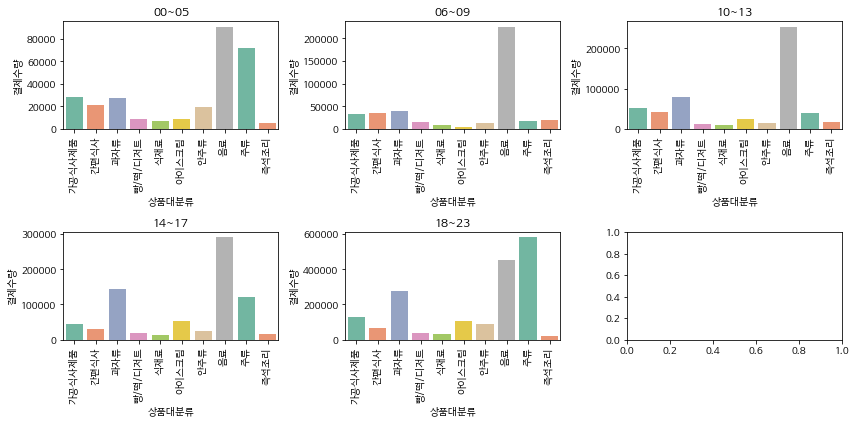

In [ ]:
food_func(temp0)


# 00~05 : 음료 > 주류 > 간편식사 > 과자 
# 06~09 : 음료 > 과자 > 간편식사 > 가공식사
# 10~13 : 음료 > 과자 > 가공식사 > 간편식사 
# 14~17 : 음료 > 과자 > 주류 > 아이스크림 
# 18~23 : 주류 > 음료 > 과자 > 가공식사 

# 음료 > 과자 > 간편식사 

# 식재료 반찬 > 안주류 > 디저트 

#### [1군집]

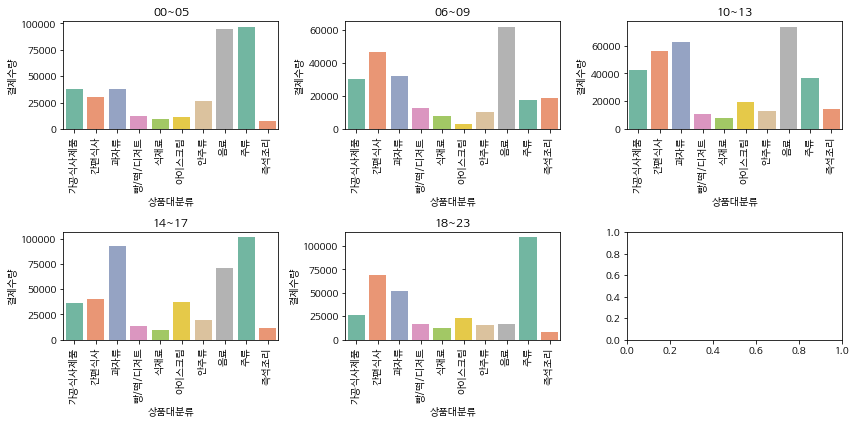

In [ ]:
food_func(temp1)

# 00~05 : 주류 > 음료 > 과자 
# 06~09 : 음료 > 간편식사 > 과자
# 10~13 : 음료 > 과자 > 간편식사 
# 14~17 : 주류 > 과자 > 음료 
# 18~23 : 주류 > 간편식사 > 과자

# 주류 > 간편식사 > 과자 

#### [2군집]

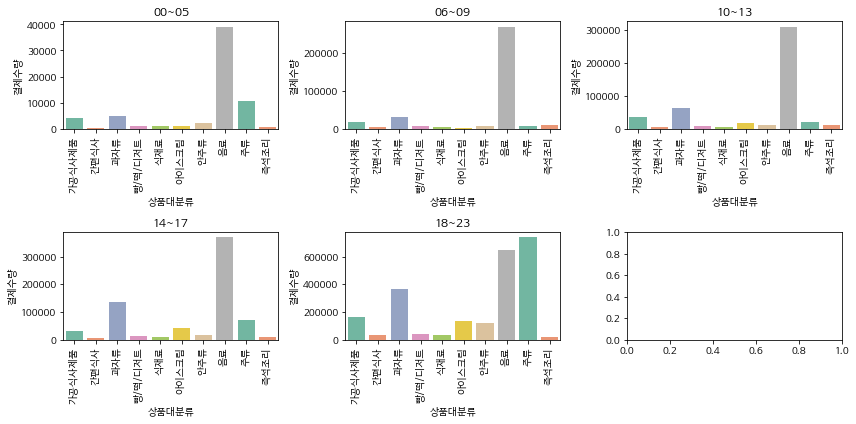

In [ ]:
food_func(temp2)

# 00~05 : 음료 > 주류 > 과자 > 가공식사
# 06~09 : 음료 > 과자 > 가공식사 
# 10~13 : 음료 > 과자 > 가공식사
# 14~17 : 음료 > 과자 > 주류 
# 18~23 : 주류 > 음료 > 과자 